## DIA 005: Predicción de Series Temporales Simples


La predicción de series temporales es una técnica fundamental en análisis de datos que se utiliza para prever valores futuros basándose en datos históricos. Una de las metodologías más utilizadas para este propósito es el modelo ARIMA (AutoRegressive Integrated Moving Average).

ARIMA combina tres componentes principales:

- AR (AutoRegresivo): Representa la relación entre una observación y un número de observaciones anteriores.
- I (Integrado): Involucra la diferenciación de la serie temporal para hacerla estacionaria, es decir, para que sus propiedades estadísticas (media, varianza) no cambien con el tiempo.
- MA (Media Móvil): Captura la relación entre una observación y un error residual de un modelo de media móvil aplicado a observaciones anteriores.

Este modelo es especialmente útil para series temporales que muestran patrones lineales y pueden ser estacionarias o convertirse en estacionarias mediante diferenciación.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
import joblib

# 1. Cargar el dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url, parse_dates=['Month'], index_col='Month')
print("Primeras filas del dataset:")
print(df.head())

print("\nInformación general:")
print(df.info())

print("\nEstadísticas descriptivas:")
print(df.describe())

Primeras filas del dataset:
            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121

Información general:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB
None

Estadísticas descriptivas:
       Passengers
count  144.000000
mean   280.298611
std    119.966317
min    104.000000
25%    180.000000
50%    265.500000
75%    360.500000
max    622.000000


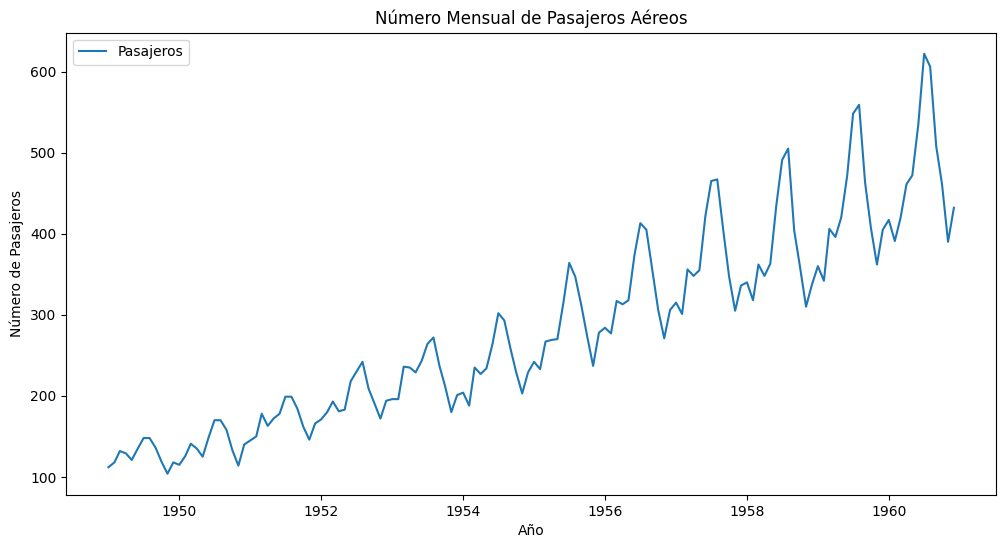

In [2]:
# 2. Visualizar la serie temporal
plt.figure(figsize=(12,6))
plt.plot(df, label='Pasajeros')
plt.title('Número Mensual de Pasajeros Aéreos')
plt.xlabel('Año')
plt.ylabel('Número de Pasajeros')
plt.legend()
plt.show()

In [3]:
# 3. Prueba de estacionariedad
def test_estacionariedad(timeseries):
    result = adfuller(timeseries)
    print('Estadístico de Prueba ADF:', result[0])
    print('Valor p:', result[1])
    print('Número de retrasos utilizados:', result[2])
    print('Número de observaciones utilizadas para la regresión:', result[3])
    print('Valores críticos:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')

print("\nPrueba de estacionariedad en la serie original:")
test_estacionariedad(df['Passengers'])


Prueba de estacionariedad en la serie original:
Estadístico de Prueba ADF: 0.8153688792060482
Valor p: 0.991880243437641
Número de retrasos utilizados: 13
Número de observaciones utilizadas para la regresión: 130
Valores críticos:
   1%: -3.4816817173418295
   5%: -2.8840418343195267
   10%: -2.578770059171598



Prueba de estacionariedad en la serie diferenciada:
Estadístico de Prueba ADF: -2.8292668241699994
Valor p: 0.0542132902838255
Número de retrasos utilizados: 12
Número de observaciones utilizadas para la regresión: 130
Valores críticos:
   1%: -3.4816817173418295
   5%: -2.8840418343195267
   10%: -2.578770059171598


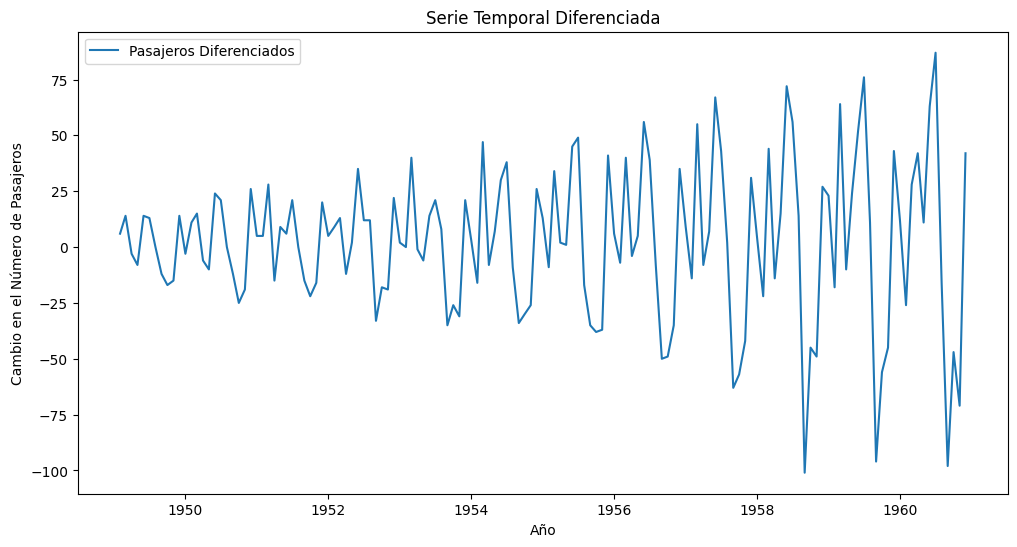

In [5]:
# 4. Hacer la serie estacionaria
df_diff = df.diff().dropna()
print("\nPrueba de estacionariedad en la serie diferenciada:")
test_estacionariedad(df_diff['Passengers'])

# Visualizar la serie diferenciada
plt.figure(figsize=(12,6))
plt.plot(df_diff, label='Pasajeros Diferenciados')
plt.title('Serie Temporal Diferenciada')
plt.xlabel('Año')
plt.ylabel('Cambio en el Número de Pasajeros')
plt.legend()
plt.show()

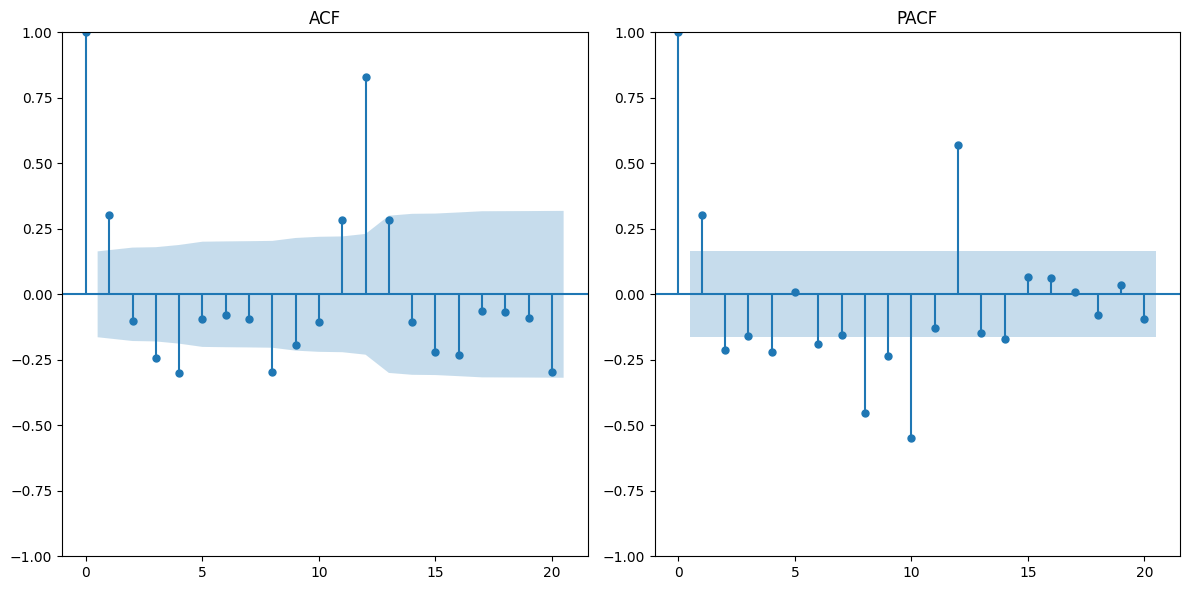

In [6]:

# 5. Visualizar ACF y PACF
plt.figure(figsize=(12,6))

plt.subplot(121)
plot_acf(df_diff, ax=plt.gca(), lags=20)
plt.title('ACF')

plt.subplot(122)
plot_pacf(df_diff, ax=plt.gca(), lags=20)
plt.title('PACF')

plt.tight_layout()
plt.show()

In [7]:
# 6. Selección de parámetros p y q usando AIC
warnings.simplefilter('ignore', ConvergenceWarning)

p = range(0, 4)
q = range(0, 4)
d = 1

best_aic = np.inf
best_order = None
best_mdl = None

for i in p:
    for j in q:
        try:
            tmp_mdl = ARIMA(df['Passengers'], order=(i,d,j)).fit()
            tmp_aic = tmp_mdl.aic
            if tmp_aic < best_aic:
                best_aic = tmp_aic
                best_order = (i, d, j)
                best_mdl = tmp_mdl
        except:
            continue

print(f'\nParámetros óptimos: p={best_order[0]}, d={best_order[1]}, q={best_order[2]} con AIC={best_aic:.2f}')


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python


Parámetros óptimos: p=3, d=1, q=3 con AIC=1345.94


In [8]:
# 7. Entrenar el modelo óptimo
model = ARIMA(df['Passengers'], order=best_order)
model_fit = model.fit()
print("\nResumen del modelo ARIMA óptimo:")
print(model_fit.summary())


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'



Resumen del modelo ARIMA óptimo:
                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -665.970
Date:                Sun, 05 Jan 2025   AIC                           1345.940
Time:                        21:43:51   BIC                           1366.680
Sample:                    01-01-1949   HQIC                          1354.368
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0109      0.158      6.414      0.000       0.702       1.320
ar.L2          0.1656      0.254      0.653      0.514      -0.331       0.663
ar.L3         -0.6

In [9]:
# 8. Realizar predicciones futuras
start = len(df)
end = start + 11  # Predecir los próximos 12 meses
pred = model_fit.predict(start=start, end=end, typ='levels')

# Crear fechas para las predicciones
pred_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=12, freq='MS')
pred_series = pd.Series(pred.values, index=pred_dates)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


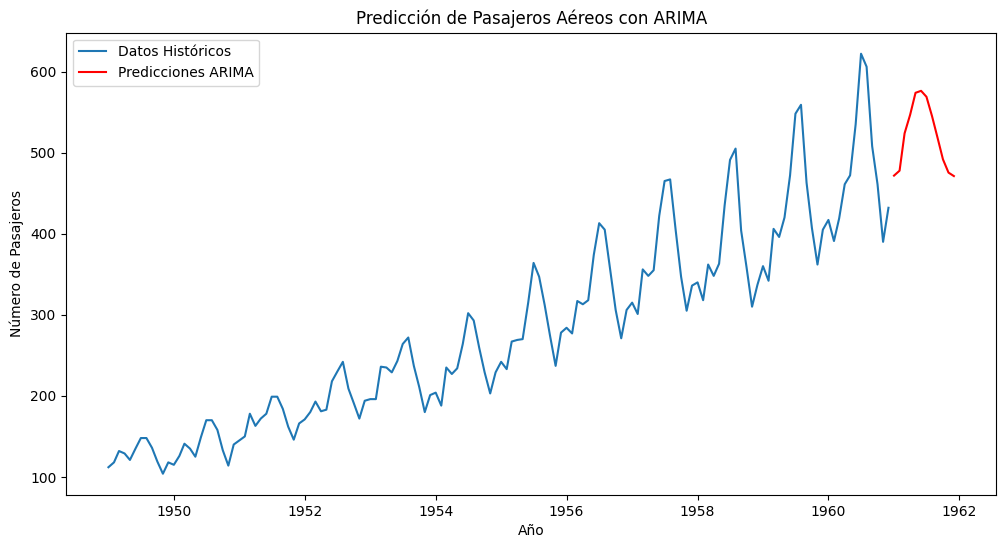

In [10]:
# 9. Visualizar las predicciones
plt.figure(figsize=(12,6))
plt.plot(df, label='Datos Históricos')
plt.plot(pred_series, label='Predicciones ARIMA', color='red')
plt.title('Predicción de Pasajeros Aéreos con ARIMA')
plt.xlabel('Año')
plt.ylabel('Número de Pasajeros')
plt.legend()
plt.show()

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'



Error Cuadrático Medio (MSE) en prueba: 3400.20
Raíz del Error Cuadrático Medio (RMSE) en prueba: 58.31


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


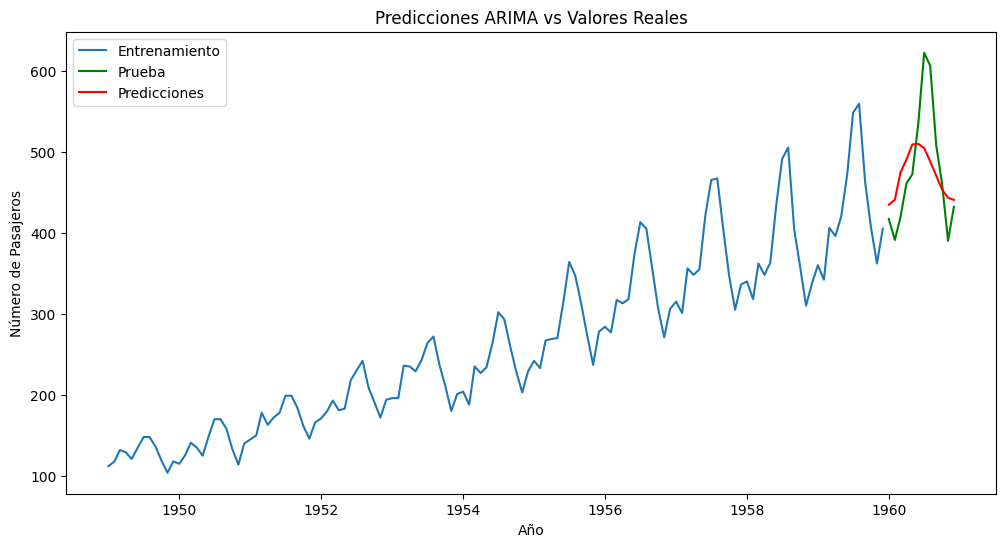

In [11]:
# 10. Evaluación del modelo usando conjunto de prueba
# Definir tamaño del conjunto de prueba (últimos 12 meses)
train = df.iloc[:-12]
test = df.iloc[-12:]

# Entrenar el modelo en el conjunto de entrenamiento
model = ARIMA(train['Passengers'], order=best_order)
model_fit = model.fit()

# Predicciones en el conjunto de prueba
pred = model_fit.predict(start=test.index[0], end=test.index[-1], typ='levels')

# Evaluar con MSE y RMSE
mse = mean_squared_error(test['Passengers'], pred)
rmse = np.sqrt(mse)
print(f'\nError Cuadrático Medio (MSE) en prueba: {mse:.2f}')
print(f'Raíz del Error Cuadrático Medio (RMSE) en prueba: {rmse:.2f}')

# Visualizar predicciones vs reales
plt.figure(figsize=(12,6))
plt.plot(train['Passengers'], label='Entrenamiento')
plt.plot(test['Passengers'], label='Prueba', color='green')
plt.plot(pred, label='Predicciones', color='red')
plt.title('Predicciones ARIMA vs Valores Reales')
plt.xlabel('Año')
plt.ylabel('Número de Pasajeros')
plt.legend()
plt.show()

In [12]:
# 11. Guardar el modelo entrenado
joblib.dump(model_fit, 'arima_model.pkl')
print("\nModelo ARIMA guardado como 'arima_model.pkl'")


Modelo ARIMA guardado como 'arima_model.pkl'
